In [21]:
%pip install tensorflow

  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl (276.6 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.9.0-cp311-cp311-win_amd64.whl (2.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
import cnnutils

# Redes neuronales convolucionales

## Reconocimiento de imágenes
<p> 1989: Yann LeCunn
<p> 1998: Modified NIST (National Institute of Standards and Technology) dataset para reconocimiento de dígitos manuscritos
    

## Imágenes

<b>Ejemplo: RGB</b>
<center><img src = "channelsrgb.gif"></center>

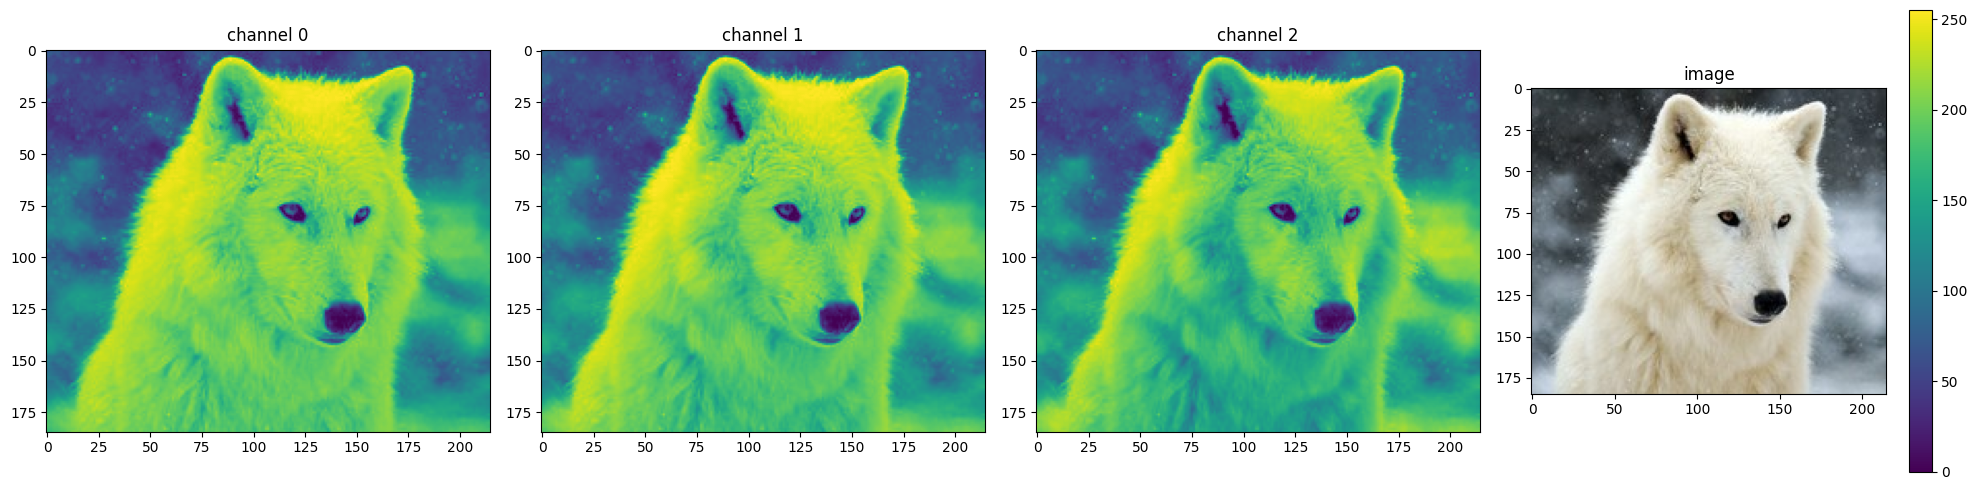

In [23]:
img = cnnutils.load_image('wolf', 'jpg')
cnnutils.plot_image(img)

In [25]:
img.shape

TensorShape([185, 215, 3])

In [26]:
img.dtype

tf.uint8

In [27]:
img

<tf.Tensor: shape=(185, 215, 3), dtype=uint8, numpy=
array([[[ 56,  65,  70],
        [ 63,  72,  77],
        [ 67,  76,  81],
        ...,
        [ 57,  62,  66],
        [ 55,  60,  64],
        [ 49,  54,  58]],

       [[ 60,  69,  74],
        [ 71,  80,  85],
        [ 76,  85,  90],
        ...,
        [ 51,  56,  60],
        [ 50,  55,  59],
        [ 46,  51,  55]],

       [[ 70,  79,  84],
        [ 77,  86,  91],
        [ 75,  84,  89],
        ...,
        [ 49,  54,  58],
        [ 50,  55,  59],
        [ 48,  53,  57]],

       ...,

       [[185, 197, 211],
        [181, 193, 207],
        [180, 194, 205],
        ...,
        [178, 191, 199],
        [175, 188, 196],
        [173, 186, 195]],

       [[179, 191, 205],
        [176, 188, 202],
        [176, 190, 201],
        ...,
        [180, 193, 201],
        [179, 192, 200],
        [178, 191, 200]],

       [[177, 189, 203],
        [173, 185, 199],
        [173, 187, 198],
        ...,
        [183, 196, 20

In [28]:
g_img = cnnutils.rgb2grayscale(img)

In [29]:
g_img.shape

TensorShape([185, 215, 1])

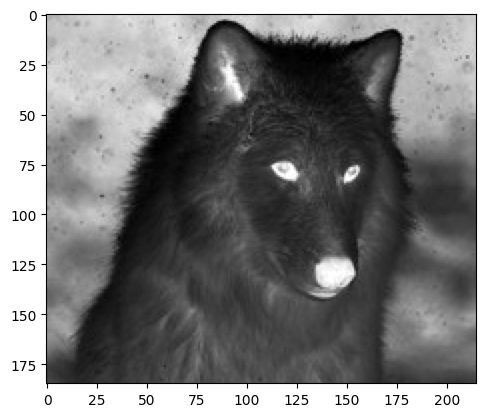

In [30]:
cnnutils.plot_grayscale(g_img)

## Redes neuronales convolucionales
<p> <b>Principio básico</b>:
<p> Usar la operación de <b>convolución</b> en lugar de la multiplicación de matrices
    

<b>Arquitectura básica</b>
<center><img src = "CNN.png" height="150" width="500"></center>

<b>Ejemplo</b>
<table>
    <tr>
        <td><img src = 'wolf.jpg'></td>
        <td>$\Rightarrow$</td>
        <td><img src = 'wolf_output2.jpg'></td>   
        <td>$\Rightarrow$</td>
        <td><img src = 'wolf_output3.jpg'></td>    
    </tr>
    <tr>
        <td><center>Imagen de entrada</center></td>
        <td>$\Rightarrow$</td>
        <td><center>Resultado de la convolución</center></td>  
        <td>$\Rightarrow$</td>
        <td><center>Resultado del subsampling</center></td>    
</tr>
</table>

<b>Capa convolucional</b>
<center><img src = "conv_layer.png" height="70" width="200"></center>

<b>Convolución 2D</b>

<center><img src = "conv.jpeg" height="150" width="500"></center>

<b>Ejemplo: Un canal</b>
<table style="width:100%">
  <tr>
    <td width="600"><img src = "conv_kernel.png" height="150" width="600"></td>
    <td>
        \begin{align*}
        \large 4\
        &\large=\, 1 \cdot 1 + 0 \cdot 0 + 0 \cdot 1 \\
        &+\large\ 1 \cdot 0 + 1 \cdot 1 + 0 \cdot 0 \\
        &+\large\ 1 \cdot 1 + 1 \cdot 0 + 1 \cdot 1 \\
        & \\
        &\Large=\ \sum_{i=-1,0,1} 
        \sum_{j=-1,0,1} \mathbf{I}_{\mathbf{1}+i,\mathbf{4}+j} \cdot \mathbf{K}_{\mathbf{1}+i,\mathbf{1}+j}
        \end{align*}
      </td>
  </tr>
</table>

<b>Padding</b>
<center><img src = "padding.png" height="150" width="500"></center>

<b>Ejemplo: Padding y múltiples canales</b>
<center><img src = "https://i.stack.imgur.com/uDgke.gif" height="300" width="600"></center>

In [31]:
# Filtro Laplaciano

kern = np.array([
            [-1,  -1, -1], 
            [-1,   8, -1], 
            [-1,  -1, -1]
        ])
kern

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [32]:
kernel_init = cnnutils.KernelInitializer(kern)
kernel_init

In [33]:
model1 = Sequential(name = 'Model_1')
model1.add(Conv2D(1, 
                  kernel_size = 3, 
                  input_shape = g_img.shape, 
                  padding = 'same', 
                  kernel_initializer = kernel_init, 
                  name = 'Conv2D'))

In [34]:
model1.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D (Conv2D)             (None, 185, 215, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
keras.utils.plot_model(model1, to_file = 'model1.png', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [36]:
output1_imgs = model1.predict(np.array([g_img]))

1/1 [==============================] - 0s 330ms/step


In [37]:
output1_imgs.shape

(1, 185, 215, 1)

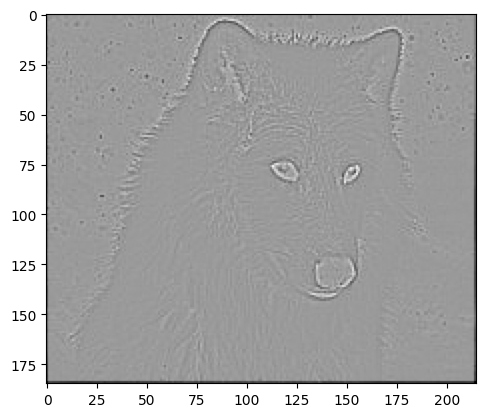

In [38]:
cnnutils.plot_grayscale(output1_imgs[0])
cnnutils.save_grayscale('wolf_output1.jpg', output1_imgs[0])

<b>Detector: Activación relu</b>

In [39]:
model2 = Sequential(name = 'Model_2')
model2.add(Conv2D(1, 
                  kernel_size = 3, 
                  input_shape = g_img.shape, 
                  padding = 'same', 
                  kernel_initializer = kernel_init, 
                  name = 'Conv2D'))
model2.add(Activation(activation = 'relu',
                      name = 'Detector'))

In [40]:
model2.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D (Conv2D)             (None, 185, 215, 1)       10        
                                                                 
 Detector (Activation)       (None, 185, 215, 1)       0         
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
keras.utils.plot_model(model2, to_file = 'model2.png', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [42]:
output2_imgs = model2.predict(np.array([g_img]))

1/1 [==============================] - 0s 156ms/step


In [43]:
output2_imgs.shape

(1, 185, 215, 1)

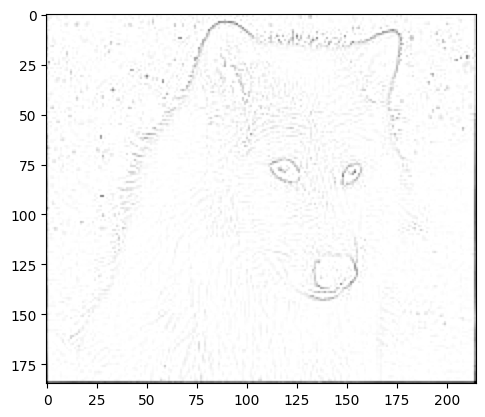

In [44]:
cnnutils.plot_grayscale(output2_imgs[0])
cnnutils.save_grayscale('wolf_output2.jpg', output2_imgs[0])

<b>Subsampling o Pooling</b>
<center><img src = "pool.jpeg" height="120" width="400"></center>

<b>Max pooling</b>
<center><img src = "maxpool.jpeg" height="150" width="500"></center>

In [45]:
model3 = Sequential(name = 'Model_3')
model3.add(Conv2D(1, 
                  kernel_size = 3, 
                  input_shape = g_img.shape, 
                  padding = 'same', 
                  kernel_initializer = kernel_init, 
                  name = 'Conv2D'))
model3.add(Activation(activation = 'relu',
                      name = 'Detector'))
model3.add(MaxPooling2D(2, 
                        padding = 'same',
                        name = 'MaxPool'))

In [46]:
model3.summary()

Model: "Model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D (Conv2D)             (None, 185, 215, 1)       10        
                                                                 
 Detector (Activation)       (None, 185, 215, 1)       0         
                                                                 
 MaxPool (MaxPooling2D)      (None, 93, 108, 1)        0         
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
keras.utils.plot_model(model3, to_file = 'model3.png', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [48]:
output3_imgs = model3.predict(np.array([g_img]))

1/1 [==============================] - 0s 61ms/step


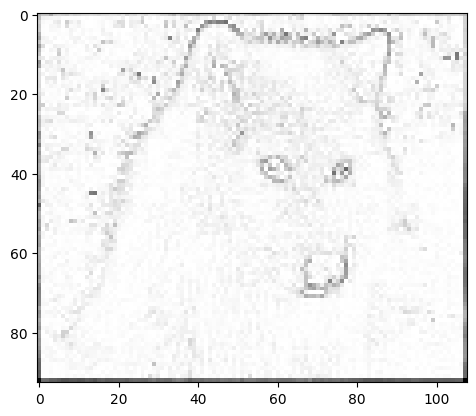

In [49]:
cnnutils.plot_grayscale(output3_imgs[0])
cnnutils.save_grayscale('wolf_output3.jpg', output3_imgs[0])

<b>Arquitectura</b>
<center><img src = "architecture.png" height="300" width="600"></center>

In [50]:
model4 = Sequential(name = 'Model_4')
model4.add(Conv2D(1, 
                  kernel_size = 3, 
                  input_shape = g_img.shape, 
                  padding = 'same', 
                  kernel_initializer = kernel_init, 
                  name = 'Conv2D'))
model4.add(Activation(activation = 'relu',
                      name = 'Dectector'))
model4.add(MaxPooling2D(2, 
                        padding = 'same',
                        name = 'MaxPool'))
model4.add(Flatten(name = 'Flatten'))
model4.add(Dense(64, 
                 activation = 'relu',
                 name = 'Densa'))
model4.add(Dense(1, 
                 activation = 'sigmoid',
                 name = 'Decision'))

In [51]:
model4.summary()

Model: "Model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D (Conv2D)             (None, 185, 215, 1)       10        
                                                                 
 Dectector (Activation)      (None, 185, 215, 1)       0         
                                                                 
 MaxPool (MaxPooling2D)      (None, 93, 108, 1)        0         
                                                                 
 Flatten (Flatten)           (None, 10044)             0         
                                                                 
 Densa (Dense)               (None, 64)                642880    
                                                                 
 Decision (Dense)            (None, 1)                 65        
                                                                 
Total params: 642955 (2.45 MB)
Trainable params: 642955 (2.

In [52]:
keras.utils.plot_model(model4, to_file = 'model4.png', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [53]:
model4.predict(np.array([g_img]))

1/1 [==============================] - 0s 101ms/step


array([[1.]], dtype=float32)

In [54]:
%pip install pydot


  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
